<a href="https://colab.research.google.com/github/john-hafner/PHY451-Muon/blob/main/Muon_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 20-10-22-16-13.data to 20-10-22-16-13.data


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['20-10-22-16-13.data']), delim_whitespace=True, names=['decay_time', 'timestamp'], header=None)# Dataset is now stored in a Pandas Dataframe
df.head()

,decay_time,timestamp
0,40000,1603397589
1,40000,1603397590
2,20000,1603397590
3,20000,1603397590
4,20000,1603397590


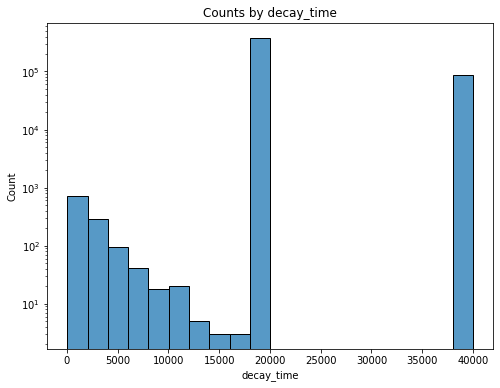

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df['decay_time'])
plt.yscale('log')
plt.title('Counts by decay_time')
plt.show()

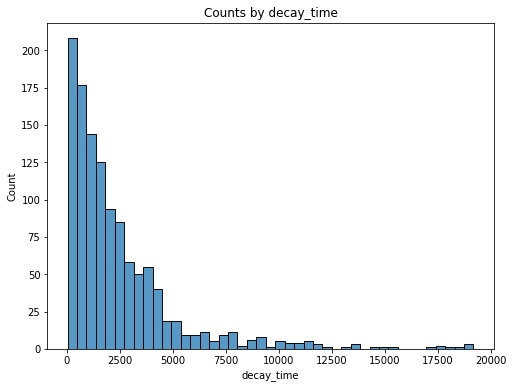

In [ ]:

good_df = df[df['decay_time'] < 20000]

plt.figure(figsize=(8,6))
sns.histplot(data=good_df['decay_time'])
#plt.yscale('log')
plt.title('Counts by decay_time')
plt.show()

In [ ]:
good_df.describe()

,decay_time,timestamp
count,1182.000000,1.182000e+03
mean,2409.170897,1.603440e+09
std,2717.952451,2.486747e+04
min,40.000000,1.603398e+09
25%,720.000000,1.603418e+09
50%,1580.000000,1.603441e+09
75%,3080.000000,1.603461e+09
max,19180.000000,1.603483e+09


In [ ]:
mean = good_df['decay_time'].mean() / 1000 # us
err = np.sqrt(mean) # us

print(f'T = {mean:.1f} +/- {err:.2E} us')

T = 2.4 +/- 1.55E+00 us


In [ ]:
t_max = df['timestamp'].max()
t_min = df['timestamp'].min()
print(f'max time {t_max}, min time {t_min}')

# Friday, October 23, 2020 4:02:23 PM 
# Thursday, October 22, 2020 4:13:09 PM

max time 1603483343, min time 1603397589


In [ ]:
df[df['decay_time'] < 500].shape

(208, 2)

# "Big Data" -  Using Google Cloud Storage
There was a file almost 500 MB in size on the hard drive.  It looks like data that covers almost two months, from Oct-23-2020 to Dec-28-2020.

Don't have to uncomment this cell out unless for some reason the data gets deleted, or we want to load new data from a similar location.  After one run it keeps a copy on my google drive that appears accessible.

In [1]:
# # Setting the project up, you might not be able to do this if you're not me.
# # TODO: Might be able to get rid of this, as I think it was a one-time
# # operation that moved the file to my google drive.
# from google.colab import auth
# auth.authenticate_user()

# project_id = 'msu-physics'
# !gcloud config set project {project_id}

# # Configure the bucket where it's located to copy here.
# bucket_name = 'muon-data'
# file_name = 'bigdata_20-10-23-16-19.data'
# # Download the file from a given Google Cloud Storage bucket.
# !gsutil cp gs://{bucket_name}/{file_name} /tmp/muon.data

Updated property [core/project].


In [60]:
# Read it into a csv
headers = ['decay_time', 'timestamp']
dtypes = {'decay_time' :'int', 'timestamp': 'int'}
dtypes = {'decay_time' : int, 'timestamp': str}
#dtypes = [int, pd.datetime]
df = pd.read_csv('/tmp/muon.data', delim_whitespace=True, names=['decay_time', 'timestamp'], header=None)
#df = pd.read_csv('/tmp/muon.data', delim_whitespace=True, header=None, names=headers, dtype=dtypes, parse_dates=['timestamp'], date_parser=pd.to_datetime)
# TODO: can probably do this part in the reading above.
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,decay_time,timestamp
0,40000,2020-10-23 20:19:53
1,40000,2020-10-23 20:19:54
2,20000,2020-10-23 20:19:55
3,20000,2020-10-23 20:19:55
4,20000,2020-10-23 20:19:55


In [62]:
df.shape

(30269608, 2)

**Over 30 million records in there!**

In [12]:
# Grab the ones less than 20000, we still have to figure out the
# meaning of the 20000.  And if there's any use for the 400xx records.
good_df = df[df['decay_time'] < 20000]
good_df.shape

(76535, 2)

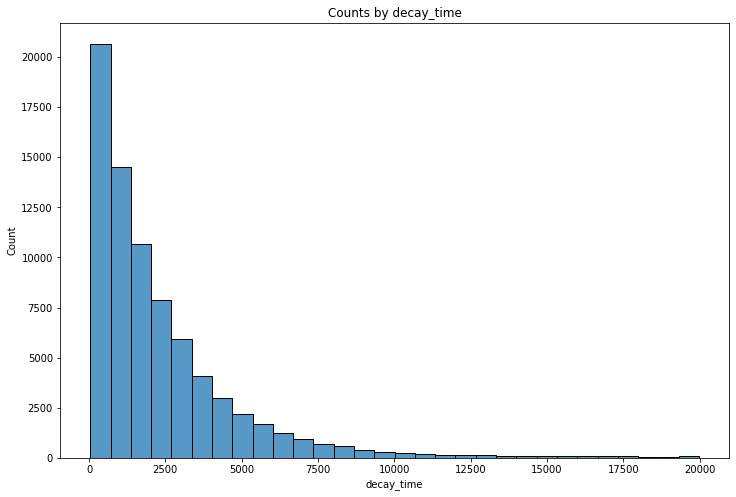

In [63]:

plt.figure(figsize=(12,8))
plt.title('Counts by decay_time')
sns.histplot(data=good_df['decay_time'], bins=30)
plt.show()

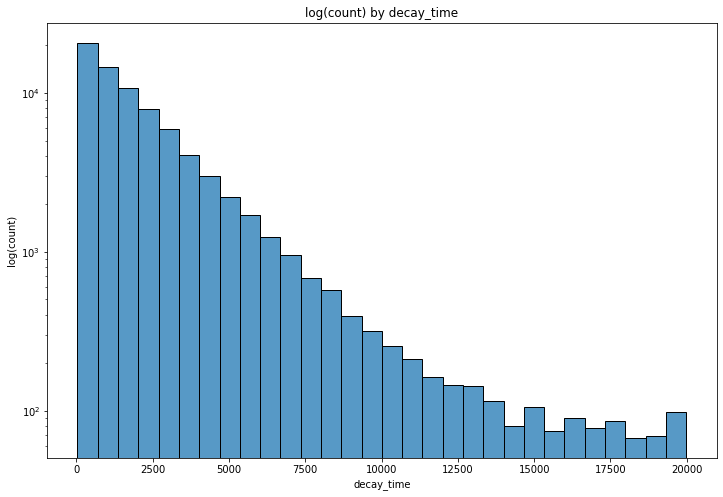

In [64]:

plt.figure(figsize=(12,8))
plt.yscale('log')
plt.title('log(count) by decay_time')
plt.ylabel('log(count)')
sns.histplot(data=good_df['decay_time'], bins=30)
plt.show()

## Summary
It's allmost beautifully perfectly logarithmic in its distribution.  So hopefully we can make do with this data in the meantime.

## Time View
Get some idea of what this data is.  Is it fairly contiguous, or many different readings stitched together.

In [65]:
# Get some idea of where the data ranges from
print('from: ', good_df['timestamp'].min())
print('to: ', good_df['timestamp'].max())

from:  2020-10-23 20:21:17
to:  2020-12-28 14:10:08


In [36]:
# Aggregating by day for a reasonable view of the data.
time_df = good_df.set_index('timestamp').resample('D').count()
time_df.head()

,decay_time
timestamp,
2020-10-23,151
2020-10-24,1108
2020-10-25,1149
2020-10-26,1180
2020-10-27,1182


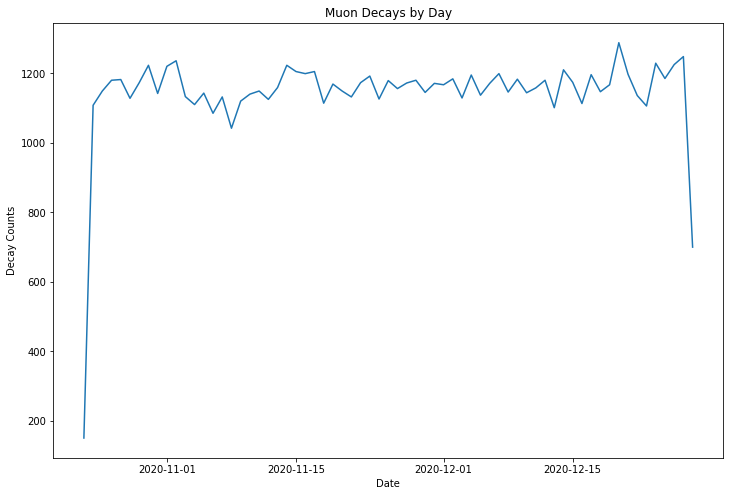

In [41]:
plt.figure(figsize=(12,8))

plt.xlabel('Date')
plt.ylabel('Decay Counts')
plt.plot(time_df)
plt.title('Muon Decays by Day')
plt.show()

### Summary
Seems like they ran an experiment for about two months, gathering data quite consistently.